In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import math

# Duomenų nuskaitymas

In [2]:
data_file = "sunspot.txt"
columns = ['year', 'sun_activity']
n = 6
data = pd.read_csv(data_file, sep="\t", header=None, names=columns)
print(data)

     year  sun_activity
0    1700             5
1    1701            11
2    1702            16
3    1703            23
4    1704            36
..    ...           ...
310  2010            16
311  2011            57
312  2012            58
313  2013            65
314  2014            79

[315 rows x 2 columns]


# Saulės dėmių aktyvumo grafikas

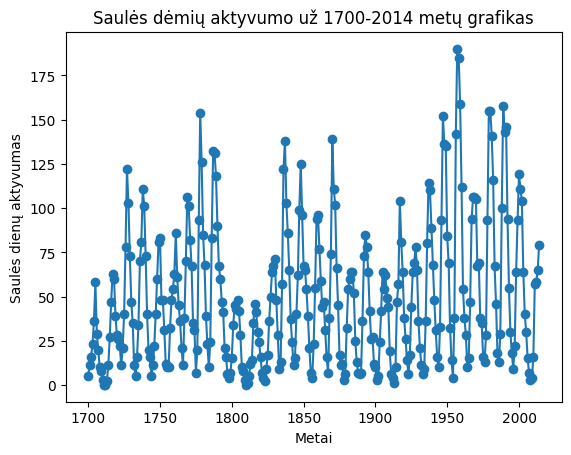

In [3]:
plt.plot(data['year'], data['sun_activity'], marker='o')
plt.xlabel('Metai')
plt.ylabel('Saulės dienų aktyvumas')
plt.title('Saulės dėmių aktyvumo už 1700-2014 metų grafikas')
plt.show()

# P ir T matricos

In [4]:
P = []
T = []

for i in range (0, len(data) - n):
    temp = []
    for j in range(n):
        temp.append(data[columns[1]][i + j])
    P.append(temp)
    T.append([data[columns[0]][i + n], data[columns[1]][i + n]])

T = pd.DataFrame(T, columns=[columns[0], columns[1]])


# P ir T trimatė diagrama

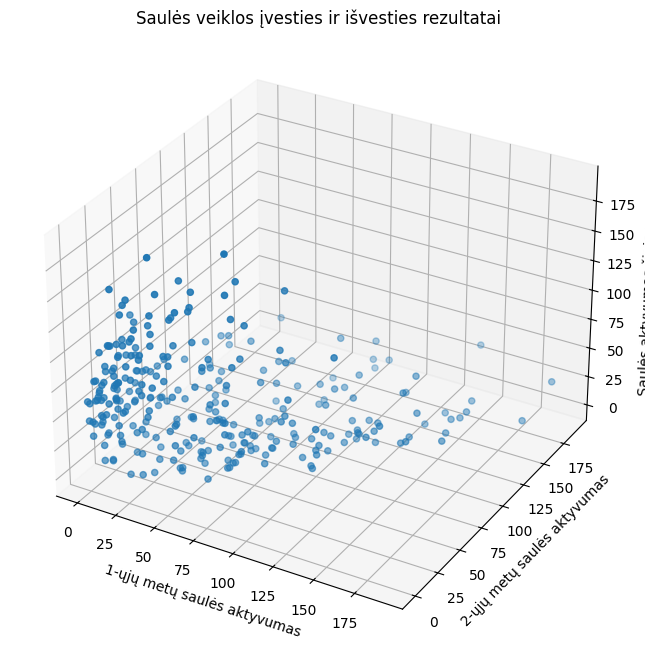

In [5]:
first_year = [i[0] for i in P]
second_year = [i[1] for i in P]

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(first_year, second_year, T["sun_activity"])
ax.set_xlabel('1-ųjų metų saulės aktyvumas')
ax.set_ylabel('2-ųjų metų saulės aktyvumas')
ax.set_zlabel('Saulės aktyvumas šiais metais')
ax.set_title('Saulės veiklos įvesties ir išvesties rezultatai')
plt.show()

# P ir T duomenų rinkinių išskyrimas

In [6]:
Pu = P[:200]
Tu = T.head(200)

# Tiesinės autoregresijos modelio sukūrimas

In [7]:
x, y = np.array(Pu), np.array(Tu["sun_activity"])
model = LinearRegression().fit(x, y)
print(f"intercept: {model.intercept_}")

print(f"coefficients w1,w2: {model.coef_}")
Tsu = model.predict(x)
Rsu = model.predict(np.array(P))

intercept: 12.487115307483826
coefficients w1,w2: [ 0.15341921 -0.23942144  0.12574875 -0.03091404 -0.64242115  1.35102406]


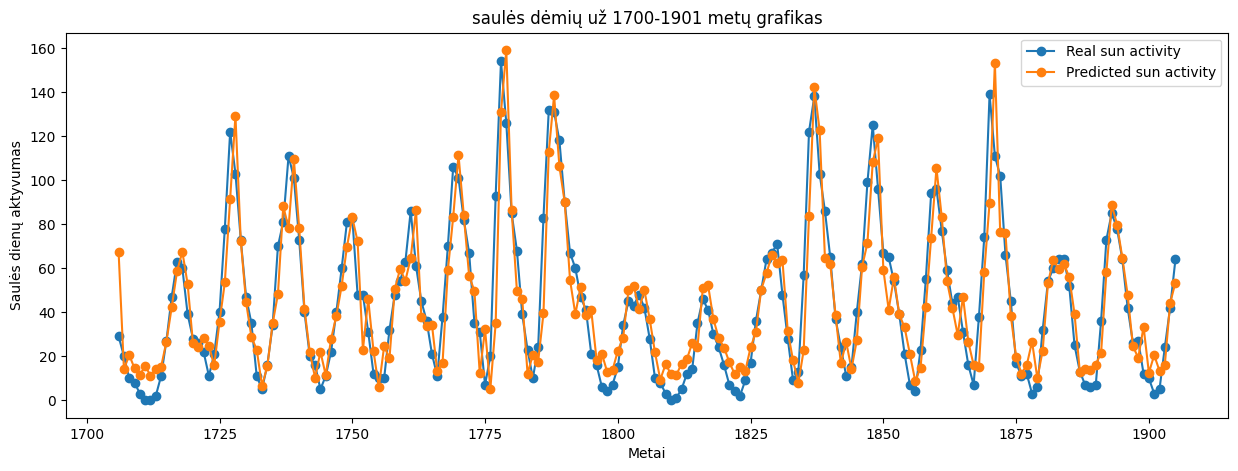

In [8]:
fig = plt.figure(figsize=(15, 5))
plt.plot(Tu["year"], Tu["sun_activity"], marker='o')
plt.plot(Tu["year"], Tsu, marker='o')
plt.legend(['Real sun activity', 'Predicted sun activity'])
plt.xlabel('Metai')
plt.ylabel('Saulės dienų aktyvumas')
plt.title('saulės dėmių už 1700-1901 metų grafikas')
plt.show()

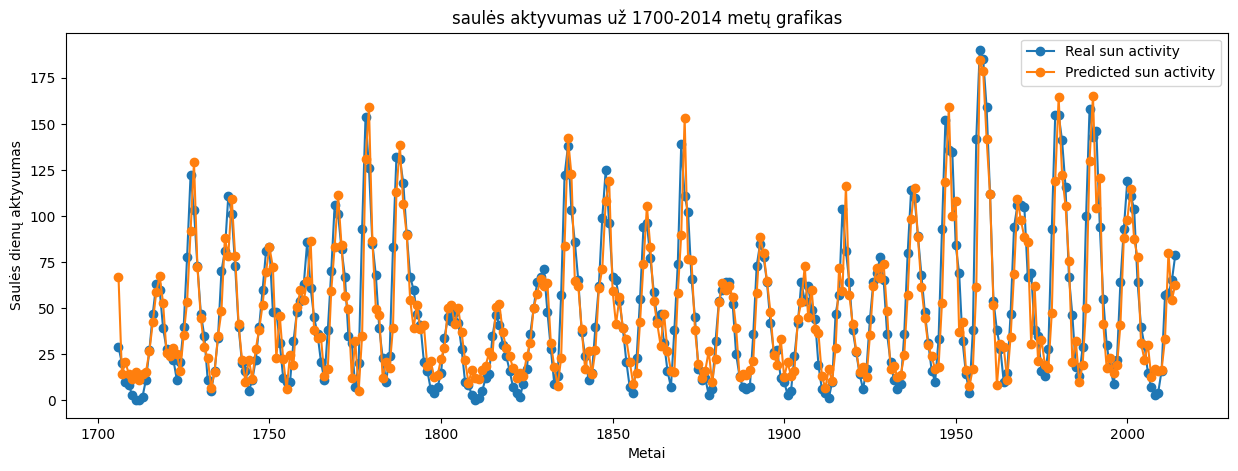

In [9]:
fig = plt.figure(figsize=(15, 5))
plt.plot(T["year"], T["sun_activity"], marker='o')
plt.plot(T["year"], Rsu, marker='o')
plt.legend(['Real sun activity', 'Predicted sun activity'])
plt.xlabel('Metai')
plt.ylabel('Saulės dienų aktyvumas')
plt.title('saulės aktyvumas už 1700-2014 metų grafikas')
plt.show()

# Klaidos vektorius

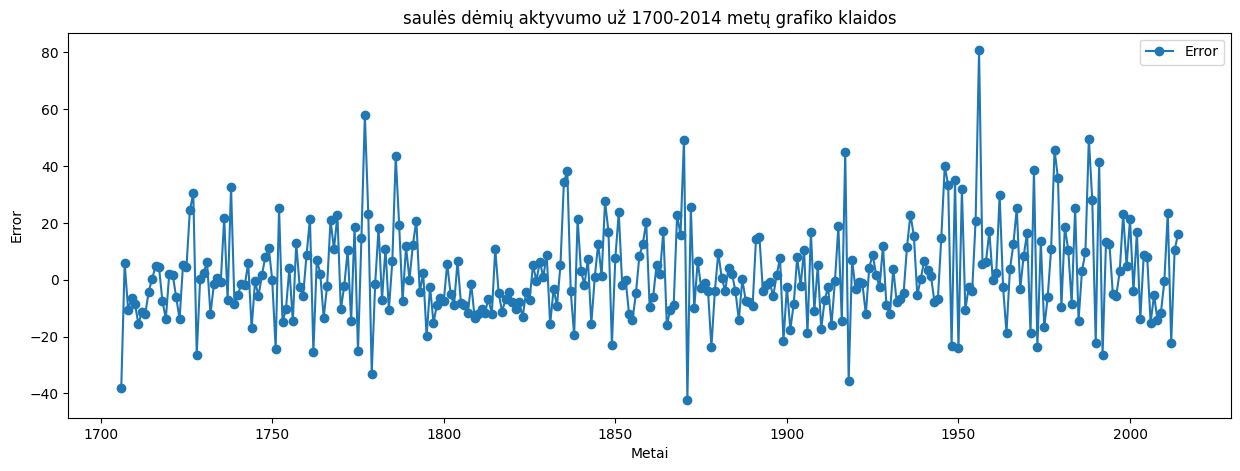

In [10]:
fig = plt.figure(figsize=(15, 5))
plt.plot(T["year"], T["sun_activity"] - Rsu, marker='o')
plt.legend(['Error'])
plt.xlabel('Metai')
plt.ylabel('Error')
plt.title('saulės dėmių aktyvumo už 1700-2014 metų grafiko klaidos')
plt.show()

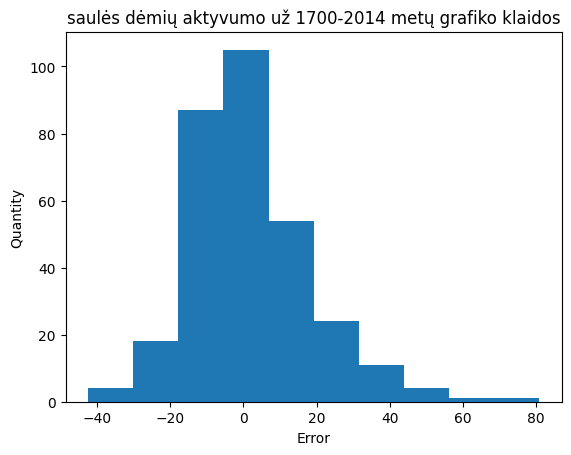

In [11]:
plt.hist(T["sun_activity"] - Rsu)
plt.xlabel('Error')
plt.ylabel('Quantity')
plt.title('saulės dėmių aktyvumo už 1700-2014 metų grafiko klaidos')
plt.show()

# Vidutinės kvadratinės prognozės klaidos ir absoliutaus nuokrypio medianos apskaičiavimas

In [12]:
error_sum = 0
for i in (T["sun_activity"] - Rsu):
    error_sum += math.pow(i, 2)
mse = 1 / len(T) * error_sum
mde = np.median(np.absolute(T["sun_activity"] - Rsu))
print("MSE: {}".format(mse))
print("MDE: {}".format(mde))

MSE: 271.040704596927
MDE: 8.955843546367685
